In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Boston = pd.read_csv("C:\\Users\\user\\Desktop\\빅데이터 8기 김영규\\ML_DL\\ML_week1\\Day2\\boston.csv")

In [3]:
Boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [10]:
#변수별 상관관계
boston = Boston.drop(columns=['CHAS','RAD'])
corr_matrix= boston.corr()

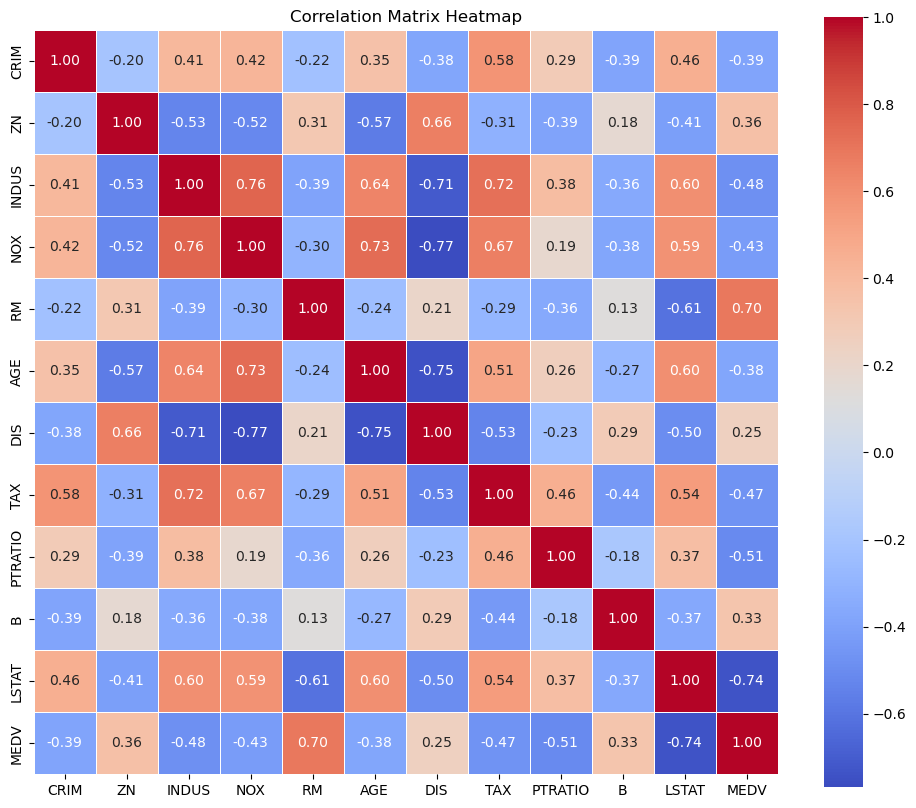

In [11]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [153]:
#데이터 분리
data_input = Boston.drop(columns=['CHAS','RAD','MEDV','B','CRIM'])
data_target = Boston[['MEDV']]

In [154]:
data_input = data_input.to_numpy()
data_target = data_target['MEDV'].to_numpy()

In [155]:
train_input, test_input, train_target, test_target = train_test_split(
    data_input,
    data_target, 
    random_state=27)

In [34]:
#중회귀
from sklearn.linear_model import LinearRegression

In [156]:
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.7139621833508396
0.7043110002932488


In [157]:
# 결정계수가 너무 낮아, 과소적합 문제가 있음을 확인해 Poly를 사용
from sklearn.preprocessing import PolynomialFeatures

In [158]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

PolynomialFeatures(include_bias=False)

In [159]:
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [160]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.8750812414071877
0.8811475484701385


In [120]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler

In [161]:
ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [162]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.8750812414071877
0.8811475484701385


In [25]:
# 과적합 해소
# 릿지
from sklearn.linear_model import Ridge

In [163]:
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.8619824353812107
0.8697501508274917


In [27]:
#라쏘
from sklearn.linear_model import Lasso

In [164]:
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.7221094287488825
0.7045750942058915


In [151]:
#릿지의 결정계수가 더 높기때문에 릿지 사용.
train_score=[]
test_score=[]

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

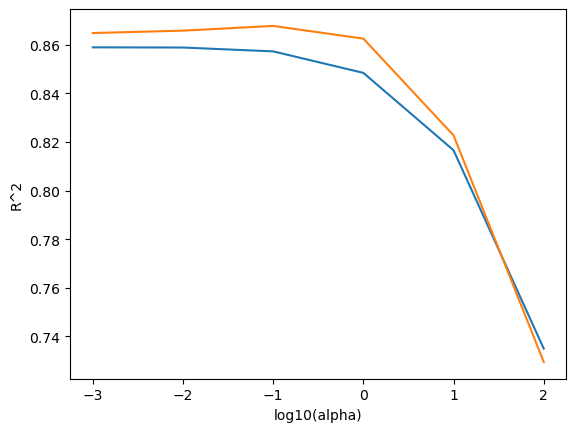

In [152]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('log10(alpha)')
plt.ylabel('R^2')
plt.show()

In [140]:
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.8619824353812107
0.8697501508274917
